<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/JARVIS_DFPT_High_throughput_Density_Functional_Perturbation_Theory_and_Machine_Learning_Predictions_of_Infrared%2C_Piezoelectric_and_Dielectric_Responses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Reference:**

[High-throughput density functional perturbation theory and machine learning predictions of infrared, piezoelectric, and dielectric responses](https://www.nature.com/articles/s41524-020-0337-2)



In [1]:
!pip install jarvis-tools

     |████████████████████████████████| 962 kB 5.1 MB/s 
     |████████████████████████████████| 325 kB 24.2 MB/s 


In [2]:
from jarvis.db.figshare import data,get_jid_data
import pandas as pd
dft_3d=data('dft_3d')
df=pd.DataFrame(dft_3d)

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 31.9M/31.9M [00:03<00:00, 9.75MiB/s]


Loading the zipfile...
Loading completed.


In [4]:
pip install matplotlib-venn

<Figure size 432x288 with 0 Axes>

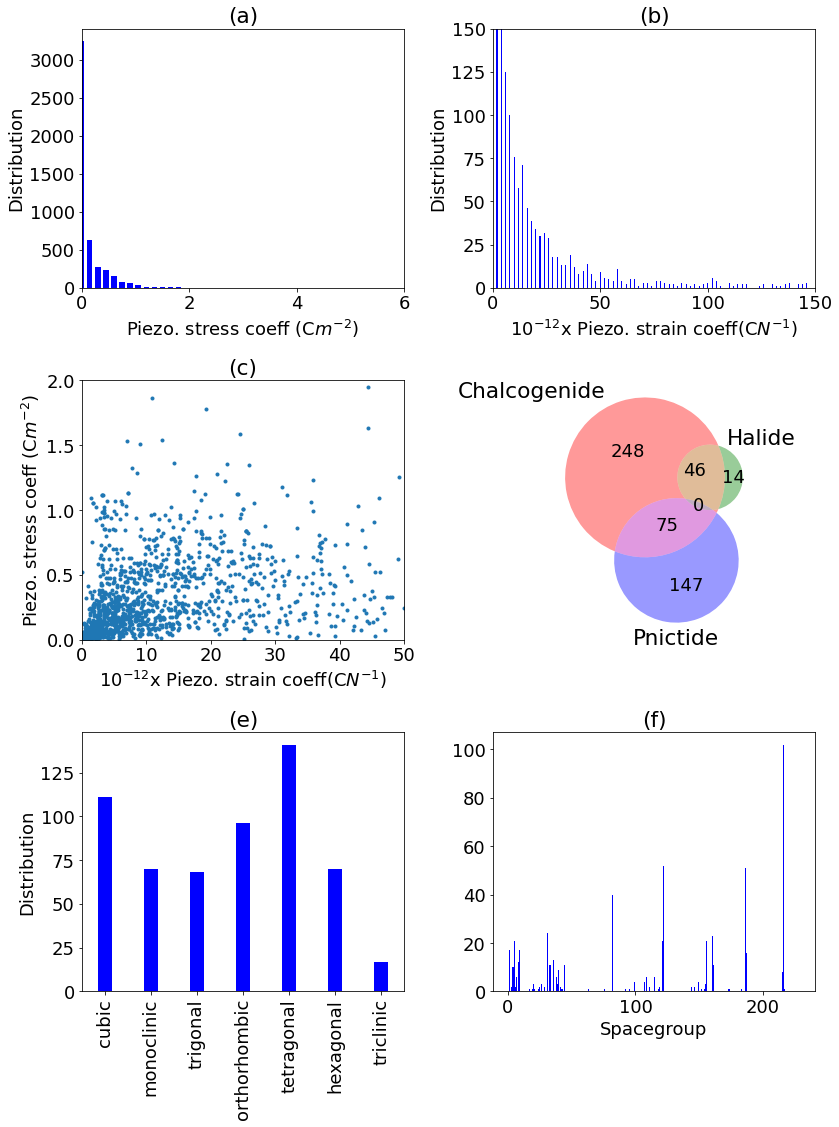

In [15]:
from collections import defaultdict
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from jarvis.core.composition import Composition
from matplotlib_venn import venn3, venn3_circles
the_grid = GridSpec(3, 2)
fig=plt.figure()
plt.figure(figsize=(12,16))
plt.rcParams.update({'font.size': 18})
plt.subplot(the_grid[0, 0])
val=np.array(df['dfpt_piezo_max_eij'].replace('na',np.nan).dropna().values,dtype='float')
hist, bins = np.histogram(val,bins=np.arange(0,6 , .15), density=False)
plt.bar(bins[:-1],hist,color='b',width=0.1)
plt.xlabel('Piezo. stress coeff (C$m^{-2}$)')
plt.ylabel('Distribution')
plt.xlim([0,6])
plt.title('(a)')

plt.subplot(the_grid[0, 1])
val=np.array(df['dfpt_piezo_max_dij'].replace('na',np.nan).dropna().values,dtype='float')
hist, bins = np.histogram(val,bins=np.arange(0,150 , 2), density=False)
plt.bar(bins[:-1],hist,color='b',width=0.5)
plt.xlabel('10$^{-12} $x Piezo. strain coeff(C$N^{-1}$)')
plt.ylabel('Distribution')
plt.xlim([0,150])
plt.ylim([0,150])
plt.title('(b)')

plt.subplot(the_grid[1, 0])
dff=df[['dfpt_piezo_max_dij','dfpt_piezo_max_eij']].replace('na',np.nan).dropna()
plt.plot(dff['dfpt_piezo_max_dij'],dff['dfpt_piezo_max_eij'],'.')
plt.xlabel('10$^{-12} $x Piezo. strain coeff(C$N^{-1}$)')
plt.ylabel('Piezo. stress coeff (C$m^{-2}$)')
plt.xlim([0,50])
plt.ylim([0,2])
plt.title('(c)')

plt.subplot(the_grid[1, 1])
plt.title('(d)')
chalcogen=[] #O,S,Se,Te,Po
halogen=[]#F,Cl,Br,I,At
pnictogen=[]#N,P,As,Sb,Bi

spg=[]

good_crys={}
for i,ii in df.iterrows():
  if ii['dfpt_piezo_max_eij'] !='na' and ii['dfpt_piezo_max_eij']>=0.5:
    spg.append(int(ii['spg_number']))
    crys.append(all_crys_info[ii['crys']])
    good_crys.setdefault(ii['crys'],[]).append(ii['dfpt_piezo_max_eij'])
    comp=Composition.from_string(ii['formula']).to_dict()
    if set(['O','S','Se','Te','Po']).intersection(set(comp.keys())):
      chalcogen.append(ii['jid'])
    if set(["F","Cl","Br","I","At"]).intersection(set(comp.keys())):
      halogen.append(ii['jid'])
    if set(['N','P','As','Sb','Bi']).intersection(set(comp.keys())):
      pnictogen.append(ii['jid'])

cryss=[]
cryss_vals=[]
for i,j in good_crys.items():
    cryss.append(i)
    cryss_vals.append(len(j))

plt.subplot(the_grid[1, 1],aspect=1)
venn3([set(chalcogen), set(halogen), set(pnictogen)], ('Chalcogenide', 'Halide', 'Pnictide'))

plt.subplot(the_grid[2, 0])
xx=np.arange(7)
plt.bar(xx,cryss_vals,color='b',width=0.3)
plt.xticks(xx, cryss,rotation='vertical')
plt.ylabel('Distribution')
plt.xlim([-0.5,6.5])
plt.title('(e)')

plt.subplot(the_grid[2, 1])
hist, bins = np.histogram(spg,bins=np.arange(0,231 , 1), density=False)
plt.bar(bins[:-1],hist,color='b')
plt.xlabel('Spacegroup')
plt.title('(f)')


plt.tight_layout()

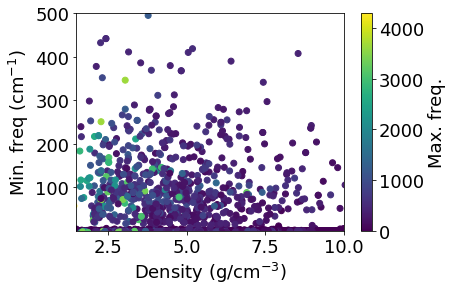

In [40]:
dff=df[['density','max_ir_mode','min_ir_mode']].replace('na',np.nan).dropna()
plt.scatter(dff['density'],dff['min_ir_mode'],c=dff['max_ir_mode'])
plt.ylim([0.1,500])
plt.xlim([1.5,10])
plt.ylabel('Min. freq (cm$^{-1}$)')
plt.xlabel('Density (g/cm$^{-3}$)')
cbar=plt.colorbar()
cbar.set_label('Max. freq.', rotation=90)


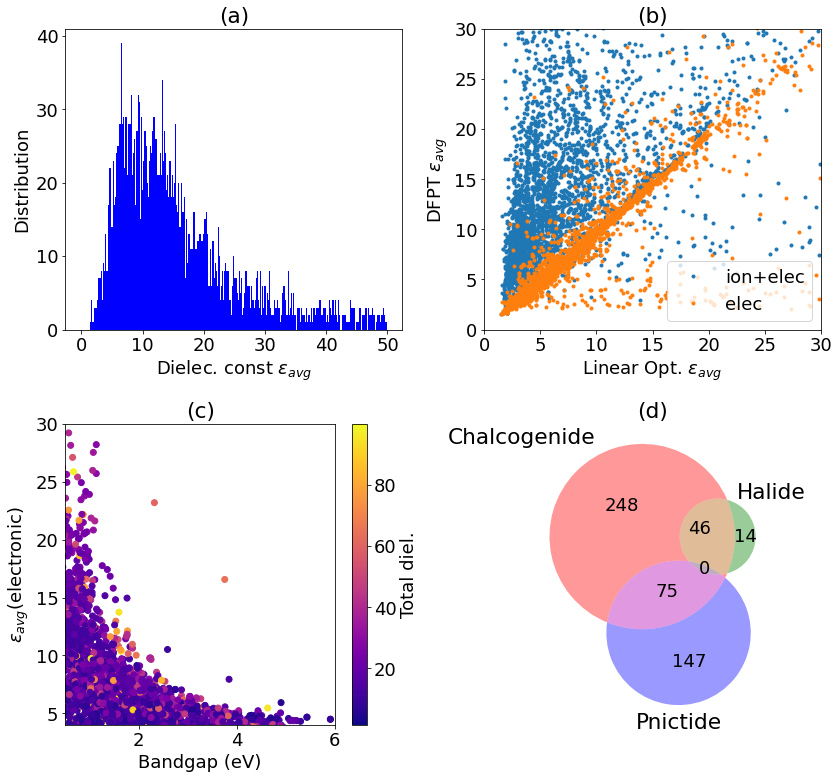

In [34]:
plt.close()
import matplotlib.pyplot as plt
the_grid = GridSpec(3, 2)
fig=plt.figure()

dff=df[['epsx','dfpt_piezo_max_dielectric_electronic','dfpt_piezo_max_dielectric_ionic','dfpt_piezo_max_dielectric','optb88vdw_bandgap']].replace('na',np.nan).dropna()
#For convenience of plotting
dff=dff[dff['dfpt_piezo_max_dielectric']<100]
max_e33=dff['dfpt_piezo_max_dielectric']
x_lop=dff['epsx']
y_lep=dff['dfpt_piezo_max_dielectric']
y_lep_elec=dff['dfpt_piezo_max_dielectric_electronic']
max_e33_gap=dff['optb88vdw_bandgap']

%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12,16))
plt.subplot(the_grid[0, 0])
hist, bins = np.histogram(max_e33,bins=np.arange(0,50 , .1), density=False)
plt.bar(bins[:-1],hist,color='b',width=0.2)
plt.xlabel('Dielec. const $\epsilon_{avg}$')
plt.ylabel('Distribution')
#plt.axvline(x=20)
#plt.xlim([0,6])
plt.title('(a)')

plt.subplot(the_grid[0, 1])
plt.plot(x_lop,y_lep,'.',label='ion+elec')
plt.plot(x_lop,y_lep_elec,'.',label='elec')
plt.ylim([0,30])
plt.xlim([0,30])
plt.legend()
plt.xlabel('Linear Opt. $\epsilon_{avg}$')
plt.ylabel('DFPT $\epsilon_{avg}$')
plt.title('(b)')




plt.subplot(the_grid[1, 0])

cmap=plt.get_cmap('plasma')
plt.scatter(max_e33_gap,y_lep_elec,c=max_e33,cmap=cmap)
cbar=plt.colorbar()

cbar.set_label('Total diel.', rotation=90)
plt.xlabel('Bandgap (eV)')
plt.xlim([0.5,6])
plt.ylim([4,30])
plt.ylabel('$\epsilon_{avg}$(electronic)')
plt.title('(c)')

plt.subplot(the_grid[1, 1],aspect=1)
chalcogen=[] #O,S,Se,Te,Po
halogen=[]#F,Cl,Br,I,At
pnictogen=[]#N,P,As,Sb,Bi
spg=[]

good_crys={}
for i,ii in df.iterrows():
  if ii['dfpt_piezo_max_eij'] !='na' and ii['dfpt_piezo_max_eij']>=0.5:
    spg.append(int(ii['spg_number']))
    crys.append(all_crys_info[ii['crys']])
    good_crys.setdefault(ii['crys'],[]).append(ii['dfpt_piezo_max_eij'])
    comp=Composition.from_string(ii['formula']).to_dict()
    if set(['O','S','Se','Te','Po']).intersection(set(comp.keys())):
      chalcogen.append(ii['jid'])
    if set(["F","Cl","Br","I","At"]).intersection(set(comp.keys())):
      halogen.append(ii['jid'])
    if set(['N','P','As','Sb','Bi']).intersection(set(comp.keys())):
      pnictogen.append(ii['jid'])

cryss=[]
cryss_vals=[]
for i,j in good_crys.items():
    cryss.append(i)
    cryss_vals.append(len(j))

venn3([set(chalcogen), set(halogen), set(pnictogen)], ('Chalcogenide', 'Halide', 'Pnictide'))
plt.title('(d)')


plt.tight_layout()
plt.show()

In [43]:
from jarvis.core.composition import Composition
import math

def ptable_map(i_data=[],tol=10,filename='my_data'):
    data_true={}
    data_false={}
    for i in i_data:
        val=i['val']
        if val>=tol:
            comp=i['comp']
           
            for k,v in comp.items():
                #print (k.symbol)
                #break
                #if k.symbol=='Ru':
                #    print ('comp,val',comp,val)
                data_true.setdefault(k, []).append(1.0)
        elif val<tol:
            comp=i['comp']
            for k,v in comp.items():
                data_false.setdefault(k, []).append(1.0)   
        else:
            print ('Problem! check data',i)
    data2_true={}
    for k1,v1 in data_true.items():
        for k2,v2 in data_false.items():
            if k1==k2:
                
                prob=100*(float(np.sum(v1))/float(np.sum(v1)+np.sum(v2)))
                data2_true.setdefault(k1, []).append(prob)

    f=open(filename,'w')
    for k,v in data2_true.items():
        line=str(k)+str(' ')+str(v[0])+str('\n')
        f.write(line)
    f.close()
    
dff=df[['formula','dfpt_piezo_max_dielectric']].replace('na',np.nan).dropna()
    
i_data=[]
for ii,i in dff.iterrows():
    info={}
    val=(i['dfpt_piezo_max_dielectric'])
    try: 
       comp=Composition.from_string(i['formula']).to_dict()
       info['comp']=comp
       info['val']=val
       i_data.append(info)
    except:
        pass
ptable_map(i_data=i_data)

In [63]:
from jarvis.analysis.periodic.ptable import plot_ptable_trend
plot_ptable_trend(input_file='my_data',save_plot=True)

/usr/local/lib/python3.7/dist-packages/jarvis/analysis/periodic/ptable.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements.group[i] = str(count + 4)
/usr/local/lib/python3.7/dist-packages/jarvis/analysis/periodic/ptable.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements.group[i] = str(count + 4)


Figure(id='1466', ...)

In [65]:
!ls ptable.png

ptable.png
